In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.compose import ColumnTransformer


In [5]:
df=pd.read_csv("loan_data.csv")

In [6]:
df.sample(10)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
16943,24.0,male,Bachelor,49050.0,4,RENT,3000.0,PERSONAL,17.27,0.06,2.0,618,No,1
11233,22.0,male,Associate,87401.0,0,OTHER,15000.0,VENTURE,11.58,0.17,2.0,622,Yes,0
38115,29.0,male,Master,31085.0,4,RENT,5449.0,PERSONAL,13.07,0.18,6.0,660,No,0
31295,45.0,male,High School,45076.0,22,OWN,2000.0,PERSONAL,7.51,0.04,16.0,664,No,0
3544,22.0,male,Associate,100959.0,0,RENT,10400.0,VENTURE,12.21,0.10,3.0,669,No,0
37974,23.0,female,High School,96064.0,0,MORTGAGE,10000.0,MEDICAL,7.54,0.10,2.0,615,Yes,0
4216,22.0,male,Associate,45723.0,0,RENT,4500.0,VENTURE,11.03,0.10,2.0,517,Yes,0
36006,23.0,female,Master,67020.0,3,MORTGAGE,8000.0,EDUCATION,7.49,0.12,4.0,656,Yes,0
27919,30.0,male,Master,27054.0,6,RENT,1500.0,DEBTCONSOLIDATION,11.71,0.06,8.0,627,No,1
32654,28.0,female,High School,61025.0,5,OWN,9772.0,PERSONAL,10.14,0.16,6.0,687,No,0


In [7]:
df.info() #datatypes of attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

# **Extrapolatory Data Analysis**

In [8]:
df.describe() #mathematical standpoint of data

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [9]:
df.shape

(45000, 14)

In [10]:
df.isnull().sum() #missing values are none

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [11]:
# person_age is numerical
df['person_gender'].value_counts() #gender has male and female (nominal cat)
df['person_education'].value_counts() #has Bachelor,Associate, High School, Master,Doctorate (ordinal cat)
# person_income is numerical
# person_emp_exp is numerical
df['person_home_ownership'].value_counts() #has rent, Mortgage, own , Other (nominal cat)
# loan_amnt is numerical
df['loan_intent'].value_counts() #has education,medical,venture,personal,Debt consolation, Home imporvement (nominal cat)
# loan_int_rate is numerical
# loan_percent_income is numerical
# cb_person_cred_hist_length is numerical / nominal categorical
# credit_score is numerical
df['previous_loan_defaults_on_file'].value_counts() # has yes or no (nominal cat)
# loan_status is numerical in nature but is categorical in nature (1 or 0)


,count
previous_loan_defaults_on_file,
Yes,22858
No,22142


In [12]:
import matplotlib.pyplot as plt

<Axes: xlabel='credit_score', ylabel='Count'>

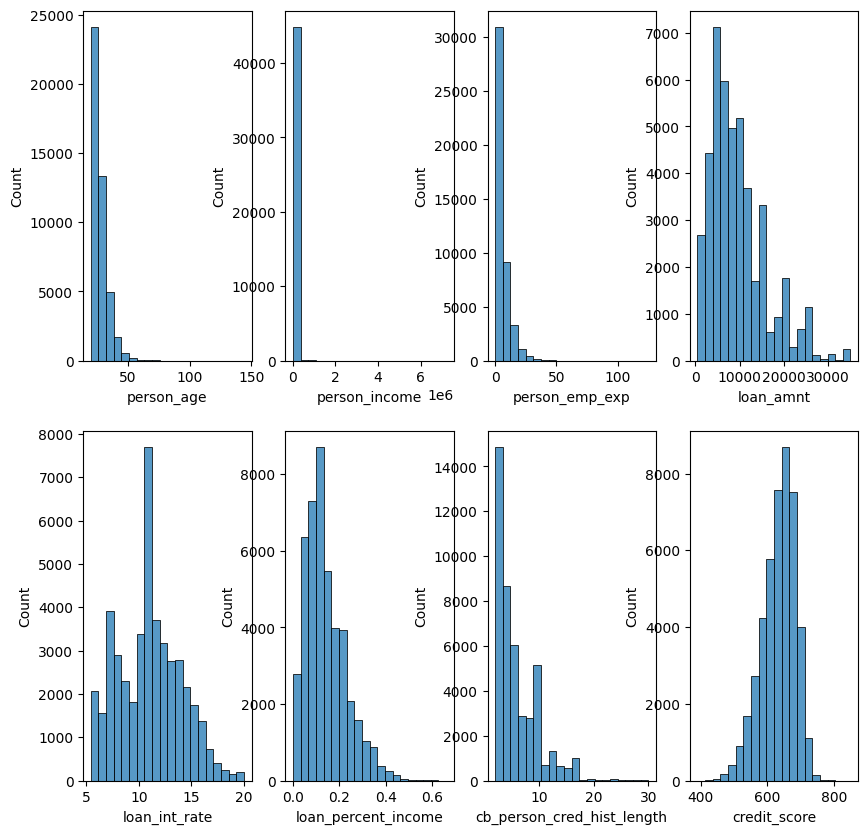

In [13]:
fig,axes=plt.subplots(nrows=2,ncols=4,figsize=(10,10))
sns.histplot(df['person_age'],bins=20,ax=axes[0,0])
sns.histplot(df['person_income'],bins=20,ax=axes[0,1])
sns.histplot(df['person_emp_exp'],bins=20,ax=axes[0,2])
sns.histplot(df['loan_amnt'],bins=20,ax=axes[0,3])
sns.histplot(df['loan_int_rate'],bins=20,ax=axes[1,0])
sns.histplot(df['loan_percent_income'],bins=20,ax=axes[1,1])
sns.histplot(df['cb_person_cred_hist_length'],bins=20,ax=axes[1,2])
sns.histplot(df['credit_score'],bins=20,ax=axes[1,3])


Text(0.5, 1.0, 'credit_score')

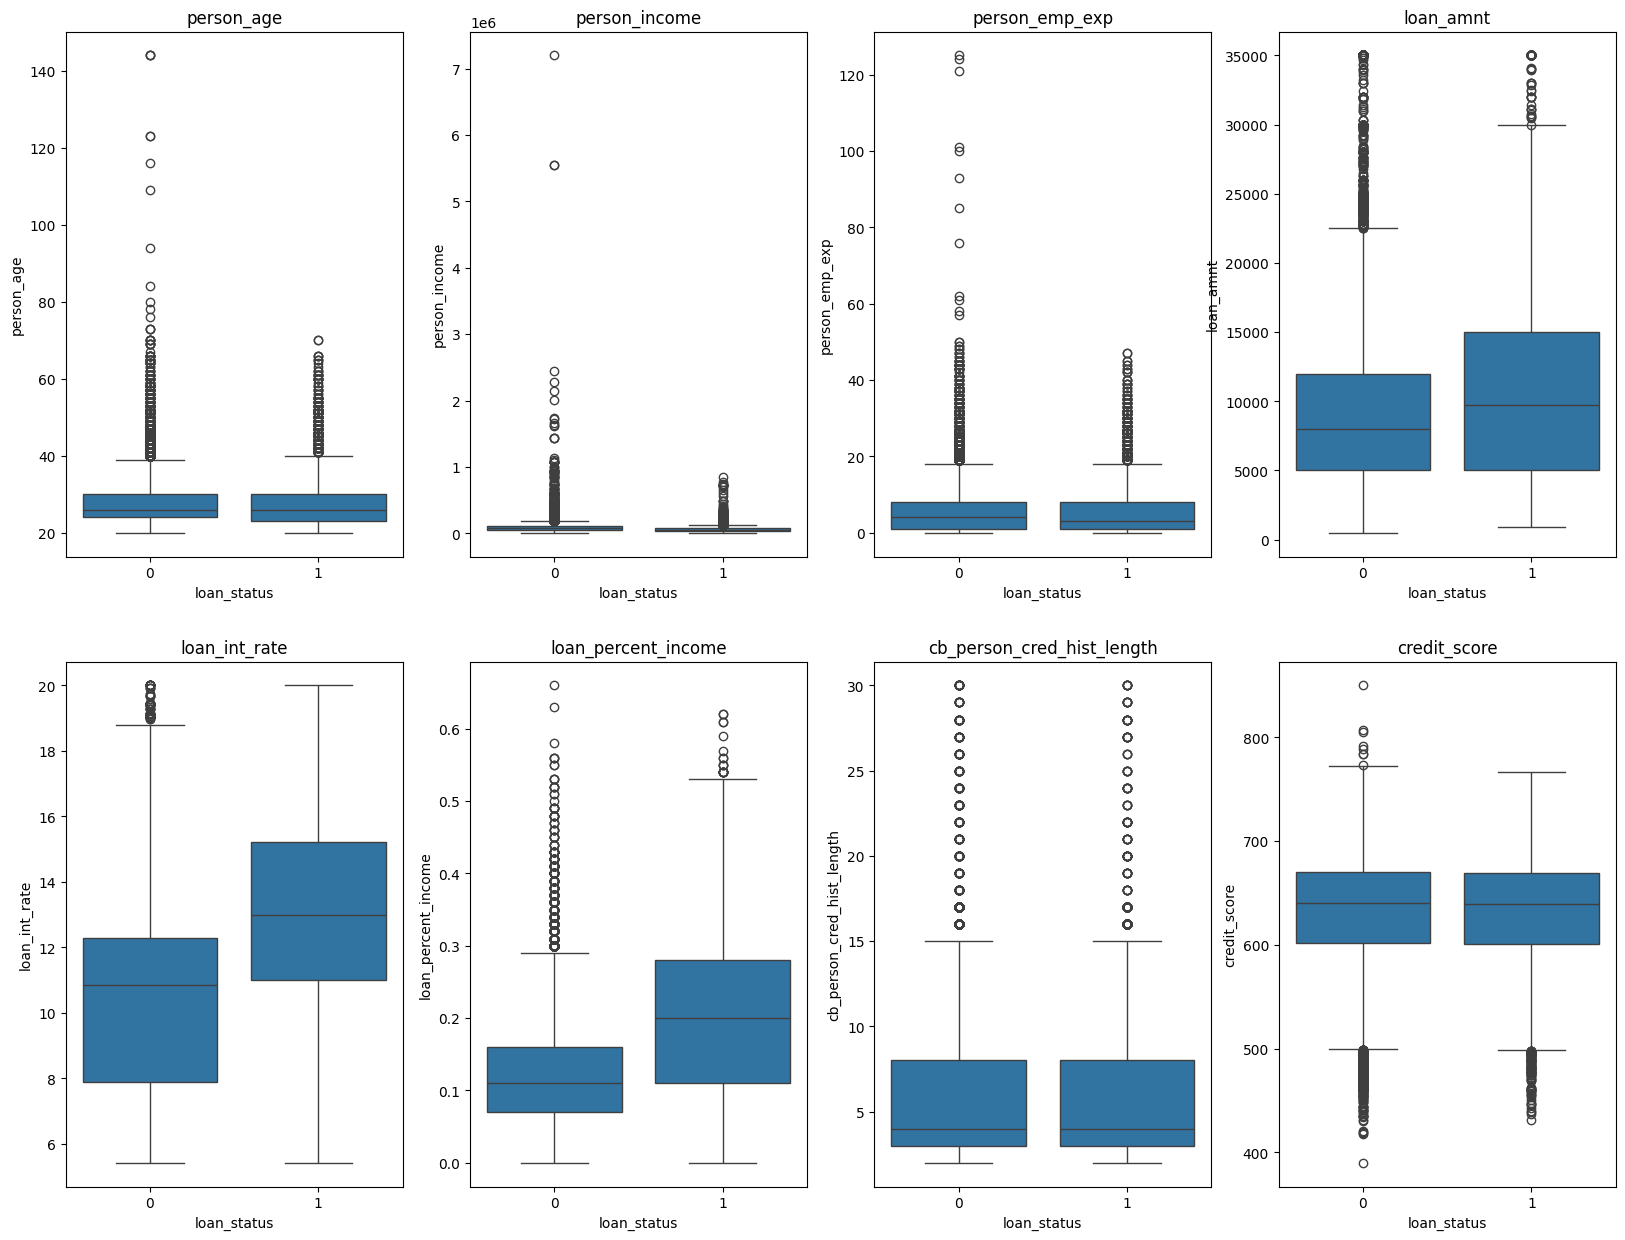

In [14]:
fig,axes=plt.subplots(nrows=2,ncols=4,figsize=(20,15))
sns.boxplot(x=df['loan_status'],y=df['person_age'],data=df,ax=axes[0,0]) #Might not be a stong predictor as it's almost the same
sns.boxplot(x=df['loan_status'],y=df['person_income'],data=df,ax=axes[0,1]) # Significant predictor as median, IQR are different
sns.boxplot(x=df['loan_status'],y=df['person_emp_exp'],data=df,ax=axes[0,2])  #IQR differs a little (moderate predictor)
sns.boxplot(x=df['loan_status'],y=df['loan_amnt'],data=df,ax=axes[0,3]) # weak predictor cause they almost same
sns.boxplot(x=df['loan_status'],y=df['loan_int_rate'],data=df,ax=axes[1,0]) # strong predictor
sns.boxplot(x=df['loan_status'],y=df['loan_percent_income'],data=df,ax=axes[1,1]) # strong predictor
sns.boxplot(x=df['loan_status'],y=df['cb_person_cred_hist_length'],data=df,ax=axes[1,2]) #weak (very weak) predictor
sns.boxplot(x=df['loan_status'],y=df['credit_score'],data=df,ax=axes[1,3]) #weak predictor
axes[0,0].set_title("person_age")
axes[0,1].set_title("person_income")
axes[0,2].set_title("person_emp_exp")
axes[0,3].set_title("loan_amnt")
axes[1,0].set_title("loan_int_rate")
axes[1,1].set_title("loan_percent_income")
axes[1,2].set_title("cb_person_cred_hist_length")
axes[1,3].set_title("credit_score")

<Axes: xlabel='previous_loan_defaults_on_file', ylabel='count'>

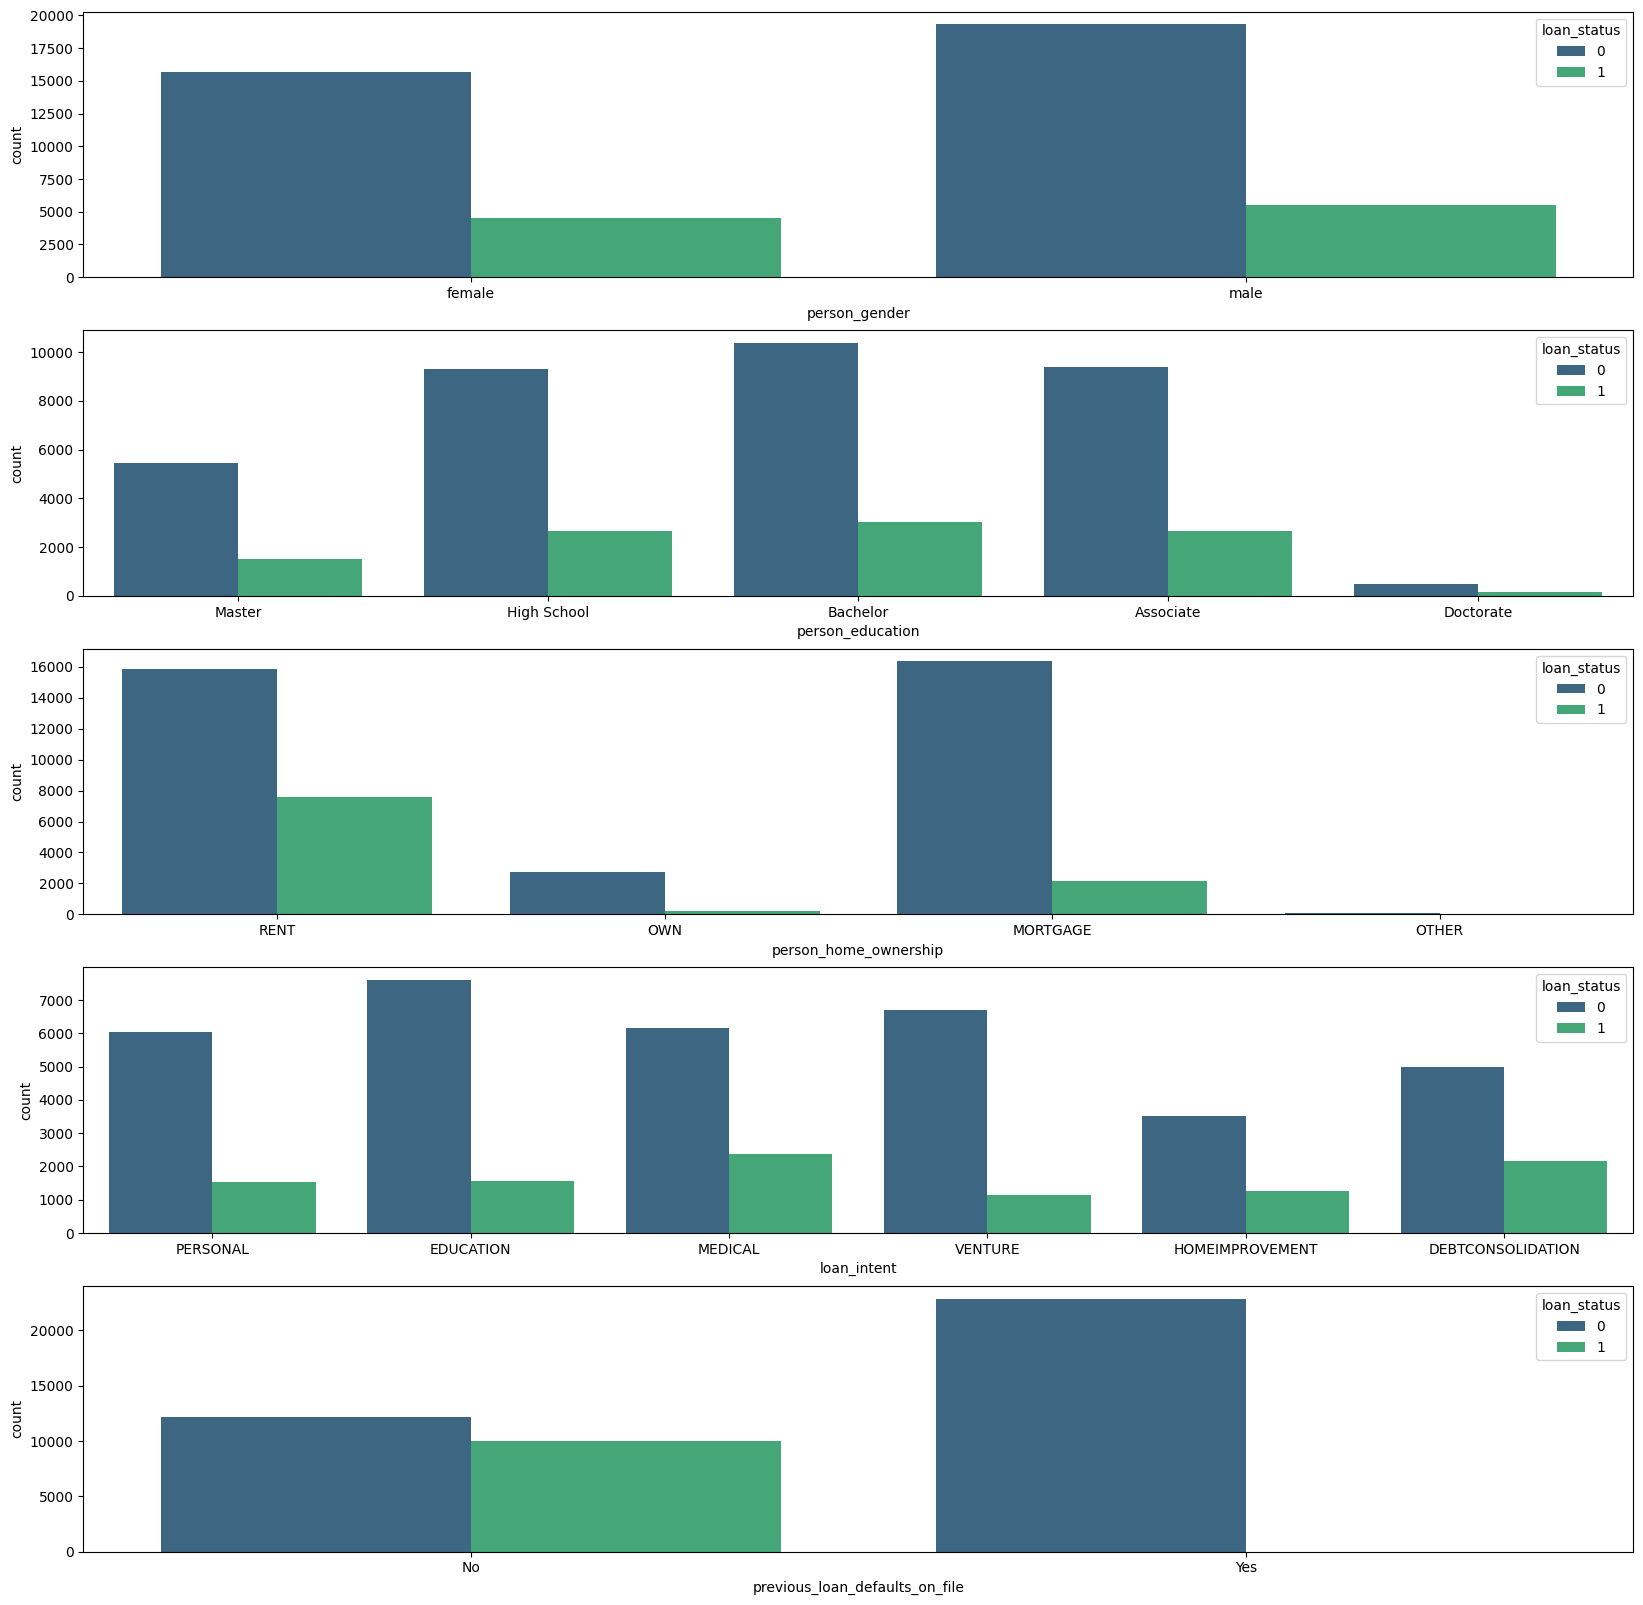

In [15]:
fig,axes=plt.subplots(nrows=5,ncols=1,figsize=(20,20))
sns.countplot(x=df['person_gender'], hue='loan_status', data=df, palette='viridis',ax=axes[0]) #weak predictor as it proportions do not change
sns.countplot(x=df['person_education'], hue='loan_status', data=df, palette='viridis',ax=axes[1]) #proportions remain the same so weak predictor
sns.countplot(x=df['person_home_ownership'], hue='loan_status', data=df, palette='viridis',ax=axes[2]) #moderate predictor
sns.countplot(x=df['loan_intent'], hue='loan_status', data=df, palette='viridis',ax=axes[3]) #moderate predictor
sns.countplot(x=df['previous_loan_defaults_on_file'], hue='loan_status', data=df, palette='viridis',ax=axes[4]) #very strong predictor as previous defaults
#result in rejection very strong predictor


<Axes: ylabel='person_income'>

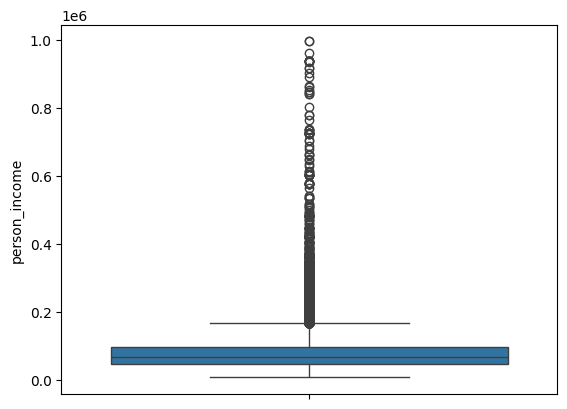

In [16]:
# plt.hist(df['person_age'],bins=5)
# sns.boxplot(y=df['person_income']) #outliers are there (more than 1*1e6)
# sns.scatterplot(df['person_income']) #threshold will be more than 4*1e6
income_threshold=1*1e6
cond=df['person_income']<=income_threshold
df=df[cond]
sns.boxplot(y=df['person_income'])

<Axes: ylabel='person_age'>

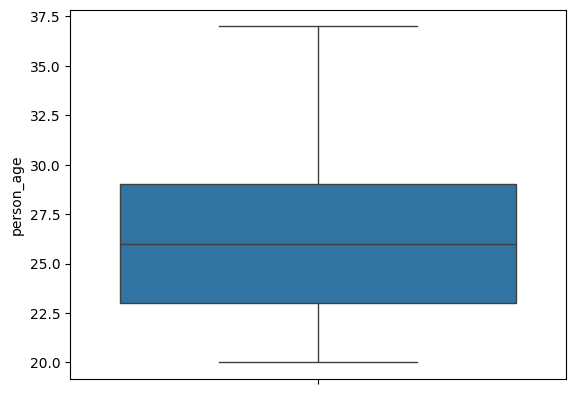

In [17]:
# sns.boxplot(df['person_age']) #threshold will be 40
age_threshold=37.5
cond=df['person_age']<=age_threshold
df=df[cond]
sns.boxplot(df['person_age'])

<Axes: ylabel='person_emp_exp'>

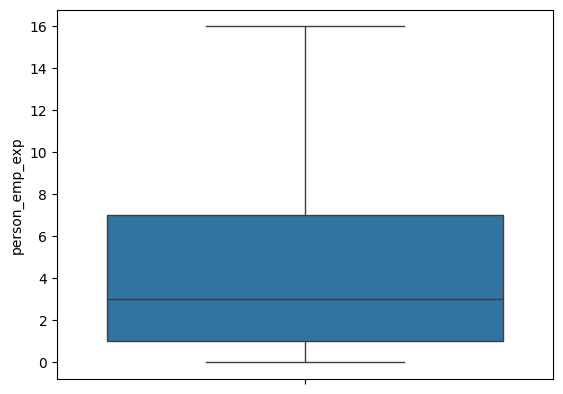

In [18]:
# sns.boxplot(df['person_emp_exp']) #threshold will be 20 robustScaler
exp_threshold=16
cond=df['person_emp_exp']<=exp_threshold
df=df[cond]
sns.boxplot(df['person_emp_exp'])

<Axes: ylabel='loan_amnt'>

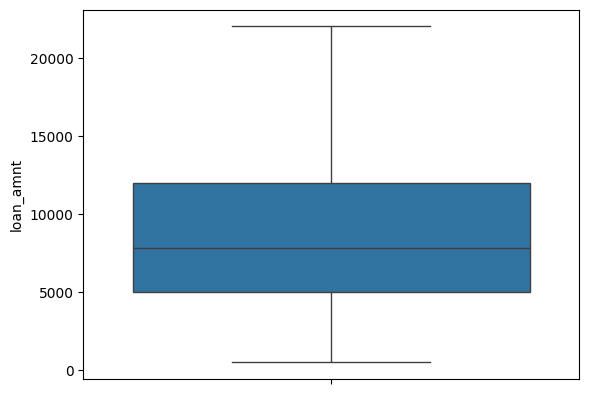

In [19]:
# sns.boxplot(df['loan_amnt']) #threshold will be 23000 use RobustScaler
loan_threshold=22000
cond=df['loan_amnt']<=loan_threshold
df=df[cond]
sns.boxplot(df['loan_amnt'])

<Axes: ylabel='loan_int_rate'>

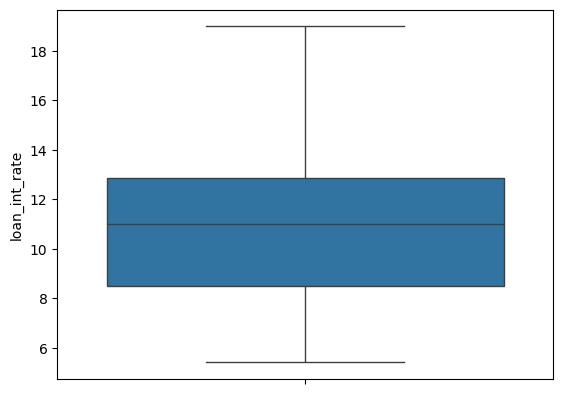

In [20]:
# sns.boxplot(df['loan_int_rate']) #threshold will be 19
int_threshold=19
cond=df['loan_int_rate']<=int_threshold
df=df[cond]
sns.boxplot(df['loan_int_rate'])

<Axes: ylabel='loan_percent_income'>

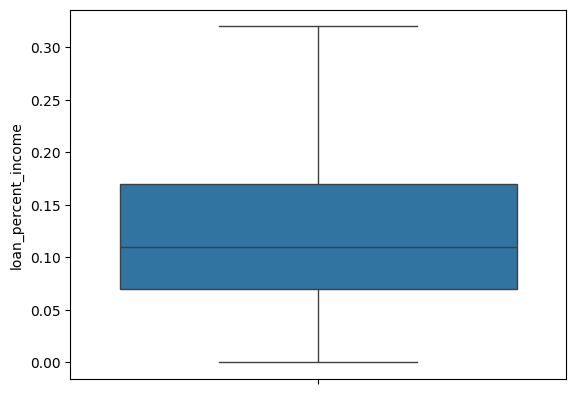

In [21]:
# sns.boxplot(df['loan_percent_income']) #threshold will be 0.38
loan_percent_threshold=0.32
cond=df['loan_percent_income']<=loan_percent_threshold
df=df[cond]
sns.boxplot(df['loan_percent_income'])

<Axes: ylabel='cb_person_cred_hist_length'>

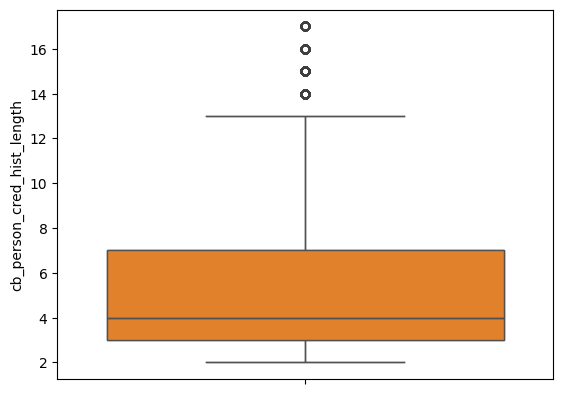

In [22]:
sns.boxplot(df['cb_person_cred_hist_length']) #threshold will be 15
credit_threshold=13
cond=df['cb_person_cred_hist_length']<=credit_threshold
df=df[cond]
sns.boxplot(df['cb_person_cred_hist_length'])

<Axes: ylabel='credit_score'>

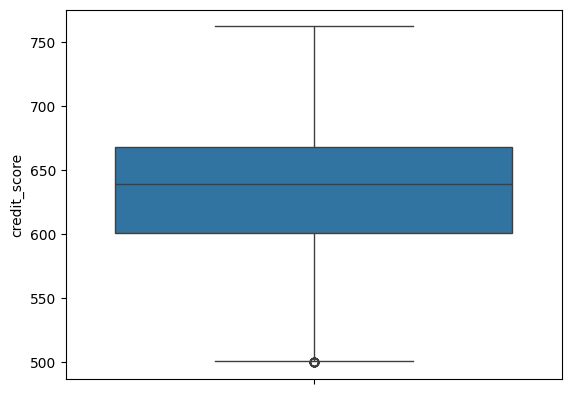

In [23]:
# sns.boxplot(df['credit_score']) #less than 500 and more then 790 are outliers
score_threshold_1=500
score_threshold_2=790
cond=df['credit_score']>=score_threshold_1
cond1=df['credit_score']<=score_threshold_2
df=df[cond & cond1]
sns.boxplot(df['credit_score'])

In [24]:
np.round(df.describe(),1)

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,37104.0,37104.0,37104.0,37104.0,37104.0,37104.0,37104.0,37104.0,37104.0
mean,26.4,76099.5,4.1,8401.9,10.9,0.1,5.0,632.4,0.2
std,3.8,46935.9,3.8,4844.2,2.9,0.1,2.6,47.5,0.4
min,20.0,8000.0,0.0,500.0,5.4,0.0,2.0,500.0,0.0
25%,23.0,47102.8,1.0,4900.0,8.5,0.1,3.0,601.0,0.0
50%,26.0,66222.5,3.0,7500.0,11.0,0.1,4.0,639.0,0.0
75%,29.0,91309.2,6.0,11660.0,12.9,0.2,7.0,668.0,0.0
max,37.0,937126.0,16.0,22000.0,19.0,0.3,13.0,762.0,1.0


Text(0.5, 1.0, 'credit_score')

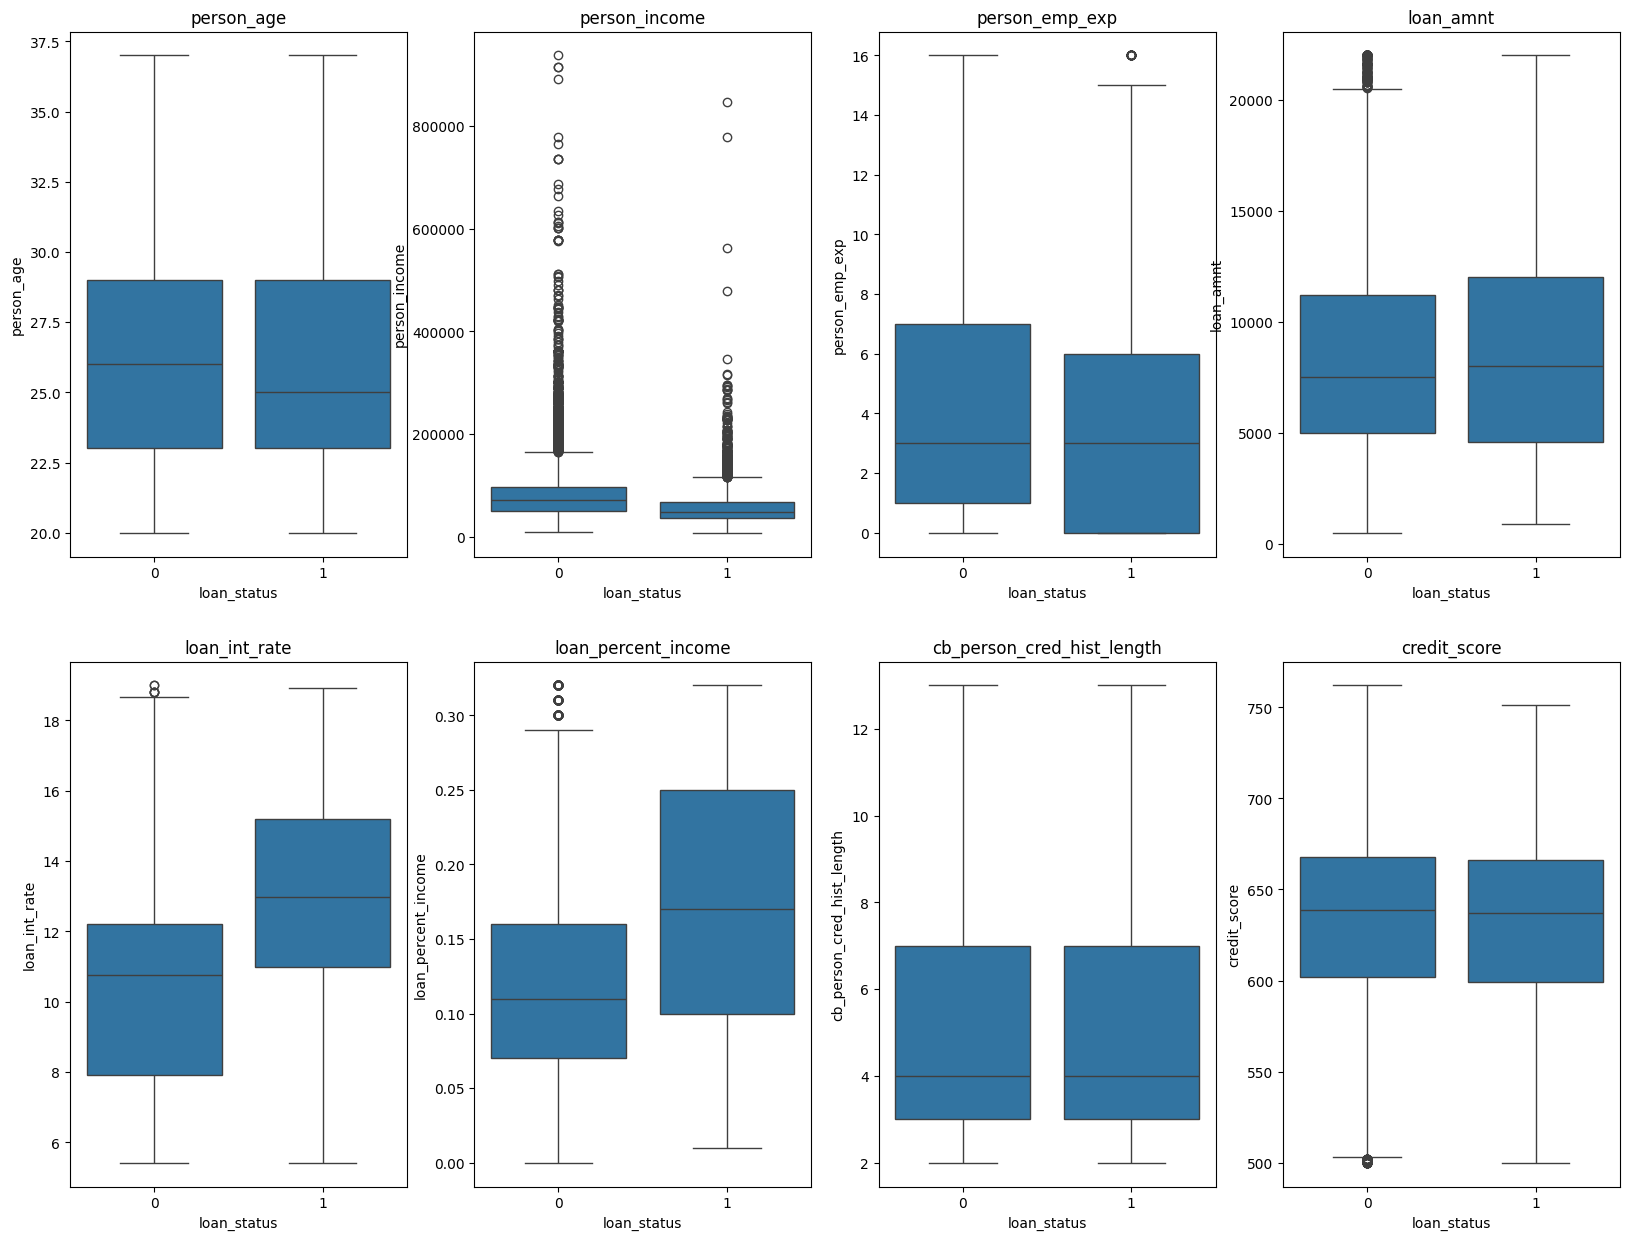

In [25]:
fig,axes=plt.subplots(nrows=2,ncols=4,figsize=(20,15))
sns.boxplot(x=df['loan_status'],y=df['person_age'],data=df,ax=axes[0,0]) #Might not be a stong predictor as it's almost the same
sns.boxplot(x=df['loan_status'],y=df['person_income'],data=df,ax=axes[0,1]) # Significant predictor as median, IQR are different
sns.boxplot(x=df['loan_status'],y=df['person_emp_exp'],data=df,ax=axes[0,2])  #IQR differs a little (moderate predictor)
sns.boxplot(x=df['loan_status'],y=df['loan_amnt'],data=df,ax=axes[0,3]) # weak predictor cause they almost same
sns.boxplot(x=df['loan_status'],y=df['loan_int_rate'],data=df,ax=axes[1,0]) # strong predictor
sns.boxplot(x=df['loan_status'],y=df['loan_percent_income'],data=df,ax=axes[1,1]) # strong predictor
sns.boxplot(x=df['loan_status'],y=df['cb_person_cred_hist_length'],data=df,ax=axes[1,2]) #weak (very weak) predictor
sns.boxplot(x=df['loan_status'],y=df['credit_score'],data=df,ax=axes[1,3]) #weak predictor
axes[0,0].set_title("person_age")
axes[0,1].set_title("person_income")
axes[0,2].set_title("person_emp_exp")
axes[0,3].set_title("loan_amnt")
axes[1,0].set_title("loan_int_rate")
axes[1,1].set_title("loan_percent_income")
axes[1,2].set_title("cb_person_cred_hist_length")
axes[1,3].set_title("credit_score")

In [26]:
# Difference in Medians (the line inside the box): If
# the median line is at a different height for loan_status 0 vs. 1, it suggests the typical value of the numerical
# feature differs between the two groups.
# Difference in IQR (the box itself): If the boxes are of different sizes or locations,
# it indicates different spreads (variability) of the numerical feature between the groups.
# Outliers: The presence and concentration of outliers in one group vs. another can be highly informative.



In [27]:
df=df.drop(columns=['person_gender','person_education'])

In [28]:
np.round(df.describe(),1)

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,37104.0,37104.0,37104.0,37104.0,37104.0,37104.0,37104.0,37104.0,37104.0
mean,26.4,76099.5,4.1,8401.9,10.9,0.1,5.0,632.4,0.2
std,3.8,46935.9,3.8,4844.2,2.9,0.1,2.6,47.5,0.4
min,20.0,8000.0,0.0,500.0,5.4,0.0,2.0,500.0,0.0
25%,23.0,47102.8,1.0,4900.0,8.5,0.1,3.0,601.0,0.0
50%,26.0,66222.5,3.0,7500.0,11.0,0.1,4.0,639.0,0.0
75%,29.0,91309.2,6.0,11660.0,12.9,0.2,7.0,668.0,0.0
max,37.0,937126.0,16.0,22000.0,19.0,0.3,13.0,762.0,1.0


In [29]:
len(df.columns)

12

# SPLLITTING AND TRANSFORMING

In [30]:
from sklearn.pipeline import Pipeline
x_train,x_test,y_train,y_test=train_test_split(df.drop('loan_status',axis=1),df['loan_status'],test_size=0.25,random_state=0)


In [31]:
# person_age is numerical
# person_income is numerical
# person_emp_exp is numerical
# df['person_home_ownership'].value_counts() #has rent, Mortgage, own , Other (nominal cat)
# loan_amnt is numerical
# df['loan_intent'].value_counts() #has education,medical,venture,personal,Debt consolation, Home imporvement (nominal cat)
# loan_int_rate is numerical
# loan_percent_income is numerical
# cb_person_cred_hist_length is numerical / nominal categorical
# credit_score is numerical
# df['previous_loan_defaults_on_file'].value_counts() # has yes or no (nominal cat)
# loan_status is numerical in nature but is categorical in nature (1 or 0)


In [32]:
numerical_cols=['person_age','person_income','person_emp_exp','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length','credit_score']
nominal_cols=['person_home_ownership','loan_intent','previous_loan_defaults_on_file']
transformer=ColumnTransformer([
    ('scaler',StandardScaler(),numerical_cols),
    ('tnf',OneHotEncoder(drop='first',sparse_output=False),nominal_cols)
],remainder='passthrough')


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict,cross_val_score

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [77]:
LR=LogisticRegression(max_iter=1000)
DC= DecisionTreeClassifier(max_depth=10)
RC= RandomForestClassifier(n_estimators=100,max_depth=10,verbose=0)

pipe1=Pipeline(steps=[
    ('transformer',transformer),
    ('LogisticRegression',LR)
])
pipe2=Pipeline(steps=[
    ('transformer',transformer),
    ('DecisionTree',DC)
])

pipe3=Pipeline(steps=[
    ('transformer',transformer),
    ('RandomForest',RC)
])

In [78]:
pipe1.fit(x_train,y_train)


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_exp',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'loan_percent_income',
                                                   'cb_person_cred_hist_length',
                                                   'credit_score']),
                                                 ('tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['person_home_ownership',
                                                   'loan_intent',
                                                   'previous_loan_defaults_on_file'])])),
                ('LogisticRegression', LogisticRegression(max_iter=1000))])

In [79]:
pipe2.fit(x_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_exp',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'loan_percent_income',
                                                   'cb_person_cred_hist_length',
                                                   'credit_score']),
                                                 ('tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['person_home_ownership',
                                                   'loan_intent',
                                                   'previous_loan_defaults_on_file'])])),
                ('DecisionTree', DecisionTreeClassifier(max_depth=10))])

In [80]:
pipe3.fit(x_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_exp',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'loan_percent_income',
                                                   'cb_person_cred_hist_length',
                                                   'credit_score']),
                                                 ('tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['person_home_ownership',
                                                   'loan_intent',
                                                   'previous_loan_defaults_on_file'])])),
                ('RandomForest', RandomForestClassifier(max_depth=10))])

In [81]:
pipe1.named_steps

{'transformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('scaler', StandardScaler(),
                                  ['person_age', 'person_income',
                                   'person_emp_exp', 'loan_amnt',
                                   'loan_int_rate', 'loan_percent_income',
                                   'cb_person_cred_hist_length',
                                   'credit_score']),
                                 ('tnf',
                                  OneHotEncoder(drop='first',
                                                sparse_output=False),
                                  ['person_home_ownership', 'loan_intent',
                                   'previous_loan_defaults_on_file'])]),
 'LogisticRegression': LogisticRegression(max_iter=1000)}

In [82]:
pipe2.named_steps

{'transformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('scaler', StandardScaler(),
                                  ['person_age', 'person_income',
                                   'person_emp_exp', 'loan_amnt',
                                   'loan_int_rate', 'loan_percent_income',
                                   'cb_person_cred_hist_length',
                                   'credit_score']),
                                 ('tnf',
                                  OneHotEncoder(drop='first',
                                                sparse_output=False),
                                  ['person_home_ownership', 'loan_intent',
                                   'previous_loan_defaults_on_file'])]),
 'DecisionTree': DecisionTreeClassifier(max_depth=10)}

In [83]:
pipe3.named_steps

{'transformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('scaler', StandardScaler(),
                                  ['person_age', 'person_income',
                                   'person_emp_exp', 'loan_amnt',
                                   'loan_int_rate', 'loan_percent_income',
                                   'cb_person_cred_hist_length',
                                   'credit_score']),
                                 ('tnf',
                                  OneHotEncoder(drop='first',
                                                sparse_output=False),
                                  ['person_home_ownership', 'loan_intent',
                                   'previous_loan_defaults_on_file'])]),
 'RandomForest': RandomForestClassifier(max_depth=10)}

In [84]:
y_pred_LR=pipe1.predict(x_test) #predicting the model on x_test

In [85]:
y_pred_DC=pipe2.predict(x_test)

In [86]:
y_pred_RC=pipe3.predict(x_test)

In [87]:
y_pred_LR #array of predictions

array([0, 0, 0, ..., 1, 0, 0])

In [88]:
y_pred_DC

array([0, 0, 0, ..., 1, 0, 1])

In [89]:
y_pred_RC

array([0, 0, 0, ..., 1, 0, 0])

In [90]:
from sklearn.metrics import accuracy_score

In [91]:
acc_LR=accuracy_score(y_test,y_pred_LR) #accuracy of the model
acc_DC=accuracy_score(y_test,y_pred_DC) #accuracy of Decision Classifier
acc_RC=accuracy_score(y_test,y_pred_RC) #accuracy score of RandomForest

In [92]:
print("Accuracy of Logistic Regression is:",acc_LR*100)
print("Accuracy of Decision Trees is:",acc_DC*100)
print("Accuracy of RandomForest  is:",acc_RC*100)

Accuracy of Logistic Regression is: 89.97412677878395
Accuracy of Decision Trees is: 91.47261750754636
Accuracy of RandomForest  is: 91.97930142302717


In [93]:
# True Positives: Loan was approved by the bank and model too.
# True Negatives : Loan was denied by the bank and the model too
# False Positives: Loan was denied by the bank but approved by the model
# False Negatives: Loan was approved by the bank but denied by the model

In [94]:
from sklearn.metrics import confusion_matrix,roc_auc_score,f1_score
print("Confusion matrix of LogisticRegression is :\n",confusion_matrix(y_test,y_pred_LR)) # Only two fields per array : LOAN GRANTED LOAN DENIED
print("ROC_AUC score of LR is:",roc_auc_score(y_test,y_pred_LR)) # ROC_AUC score is used to calculate the estimate by which model was able to predict
#which class belongs to which (i.e LR was able to correctly predict the class of the target 82 percent of the time)
print("F1 score of LR is:", f1_score(y_test,y_pred_LR)) # F1 score is the harmonic mean between recall(Senstivity) and precision (Specificity)


Confusion matrix of LogisticRegression is :
 [[7064  379]
 [ 551 1282]]
ROC_AUC score of LR is: 0.8242397815322254
F1 score of LR is: 0.733829421866056


In [95]:
print("Confusion matrix of Decision Tree Classifier is:\n",confusion_matrix(y_test,y_pred_DC))
print("ROC_AUC score of decision Tree classifier is :\n",roc_auc_score(y_test,y_pred_DC))
print("F1 score of decision tree classifier is :\n",f1_score(y_test,y_pred_DC))

Confusion matrix of Decision Tree Classifier is:
 [[7240  203]
 [ 588 1245]]
ROC_AUC score od decision Tree classifier is :
 0.8259702269710245
F1 score od decision tree classifier is :
 0.7589149649497104


In [96]:
print("Confusion matrix of RandomForest Classifier is:\n",confusion_matrix(y_test,y_pred_RC))
print("ROC_AUC score of RandomForest classifier is :\n",roc_auc_score(y_test,y_pred_RC))
print("F1 score of RandomForest classifier is :\n",f1_score(y_test,y_pred_RC))

Confusion matrix of RandomForest Classifier is:
 [[7308  135]
 [ 609 1224]]
ROC_AUC score of RandomForest classifier is :
 0.8248099632493364
F1 score of RandomForest classifier is :
 0.7669172932330827
